## Data Quality Report.


As part of data quality control, it is important to plot and look at the data and visualy inspect for errors.
This is usualy done using the Human-In-The-Loop review process:
- Examine automated test output, system annotations, and data plots.
- Enter notes at the instrument level regarding issues with data quality.

In this notebook, a set of files of a sensor collecting data over multiple deployments is used as an example to plot data and create output file to report on issues.


### Notebook Outline:
-  [Python Packages.](#1)
-  [Sensor Metadata.](#2)
-  [Define Output Directory.](#21)
-  [Deployment Coordinates.](#3)
    - [Compare Deployments Coordinate Locations.](#31)
    - [Plot Difference in Deployment Coordinate Locations.](#32)
-  [Deployment Depth.](#4)
    -  [Plot Deployment Depth Location.](#41)
-  [Deployment Start and End Dates.](#5)
    -  [Plot Deployment Timeline.](#51)
-  [Deployment Datasets.](#6)
    - [Plot Deployment Datasets - One Parameter.](#61)
    - [Plot Deployment Datasets - Multi Parameters.](#62)
    - [Plot Science Variables Without Outliers.](#63)
-  [Report Flags.](#7)
-  [Data Annotations.](#8)
-  [Data Notes.](#9)
-  [Data Report Files.](#10)

<span style='color:Orange' > **Attention:** </span> 
- To run the notebook, you need to follow the septs in order.
- For the code cell, run the cell before you move on to the next one. 
    - **Remember**: The output of a cell may be an input in the next cell.

<a id="1"></a>
### Python Packages.

In [3]:
import os
import requests
import json
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
from geopy.distance import geodesic

import matplotlib.dates as mdates
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<a id="2"></a>
### Sensor Metadata.
- The sensor metadata is obtained from a data team database.
- The function refdes_datareview_json() returns a dictionary with sensor information.
- The sensor reference designator **'GP03FLMB-RIM01-02-CTDMOG068'** is used to parse sensor information from the data review database.
- The link to the source URL for the sensor database page is found [here](http://datareview.marine.rutgers.edu/instruments/view/GP03FLMB-RIM01-02-CTDMOG060). 

In [4]:
# the source URL for the sensor database page.
sensor_url = 'http://datareview.marine.rutgers.edu/instruments/view/GP03FLMB-RIM01-02-CTDMOG068'

# add .json to the URL page to put the content of the page in a json format file.
ref_des_url = os.path.join(sensor_url,'.json')

# send a request and return the json file content in a dictionary structure.
sensor_info = requests.get(ref_des_url).json()

pd.DataFrame(sensor_info)


,instrument
annotations,"[{'id': 154, 'reference_designator': 'GP03FLMB..."
created,2017-12-12T14:13:51+00:00
current_status,Complete
data_streams,"[{'id': 5044, 'reference_designator': 'GP03FLM..."
dependency,
deployments,"[{'id': 3307, 'deploy_cuid': 'MV-1309', 'deplo..."
end_depth,500
id,992
image_url,https://marine.rutgers.edu/cool/ooi/data-eval/...
last_reviewed,None


In [5]:
# print the dictionary .keys() to use when parsing the content.
print('\n sensor information are put under the variable: \n \n', sensor_info.keys())


 sensor information are put under the variable: 
 
 dict_keys(['instrument'])


In [6]:
# go one level down in the dictionary hierarchy to parse more of the content.
print('\n variable stored under instrument are : \n\n', sensor_info['instrument'].keys())


 variable stored under instrument are : 

 dict_keys(['id', 'reference_designator', 'parent_node', 'name', 'start_depth', 'end_depth', 'location', 'current_status', 'preferred_stream', 'preferred_parameter', 'last_reviewed', 'note', 'dependency', 'image_url', 'created', 'modified', 'deployments', 'data_streams', 'node', 'notes', 'annotations'])


<a id="21" ></a>
### Define Output Directory.

In [7]:
# define a directory to save output files and data plots.
save_to_dir = '/Users/leilabelabassi/Documents/GitHub/GEOS612-data-quality/Module5/'

# define the sensor name to add to the output file names.
sensor_name = sensor_info['instrument']['reference_designator']

<a id="3"></a>
### Deployment Coordinates.

In [8]:
# Use pandas data frame to parse the dictionary sensor_info for deployments' variable.
deploy = pd.DataFrame(sensor_info['instrument']['deployments'])
deploy

,id,deploy_cuid,deployed_by,recover_cuid,recovered_by,reference_designator,deployment_number,version_number,start_date,stop_date,mooring_uid,node_uid,sensor_uid,latitude,longitude,orbit,deployment_depth,water_depth,notes
0,3307,MV-1309,None,MV-1404,None,GP03FLMB-RIM01-02-CTDMOG068,1,1,2013-07-24T06:32:00+00:00,2014-06-18T00:00:00+00:00,CGMGP-03FLMB-00001,None,CGINS-CTDMOG-10253,50.3317,-144.401,None,501.0,4145,None
1,3326,MV-1404,None,TN-323,None,GP03FLMB-RIM01-02-CTDMOG068,2,1,2014-06-20T02:00:00+00:00,2015-06-07T00:00:00+00:00,CGMGP-03FLMB-00002,None,CGINS-CTDMOG-11654,50.3313,-144.398,None,503.0,4145,None
2,3345,TN-323,None,RB-16-05,None,GP03FLMB-RIM01-02-CTDMOG068,3,1,2015-06-08T21:25:00+00:00,2016-07-03T18:35:00+00:00,CGMGP-03FLMB-00003,None,CGINS-CTDMOG-10254,50.3303,-144.398,None,519.0,4145,None
3,3364,RB-16-05,None,SR17-10,None,GP03FLMB-RIM01-02-CTDMOG068,4,1,2016-07-04T23:07:00+00:00,2017-07-17T15:02:00+00:00,CGMGP-03FLMB-00004,None,CGINS-CTDMOG-11611,50.3293,-144.398,None,NaN,4146,None
4,3383,SR17-10,None,SR1811,None,GP03FLMB-RIM01-02-CTDMOG068,5,1,2017-07-14T22:49:00+00:00,2018-07-25T17:11:00+00:00,CGMGP-03FLMB-00005,None,CGINS-CTDMOG-13425,50.3777,-144.515,None,NaN,4169,None
5,3402,SR1811,None,SKQ201920S,None,GP03FLMB-RIM01-02-CTDMOG068,6,1,2018-07-24T23:01:00+00:00,2019-09-27T23:55:00+00:00,CGMGP-03FLMB-00006,None,CGINS-CTDMOG-13617,50.3295,-144.398,None,NaN,4145,None
6,3421,SKQ201920S,None,None,None,GP03FLMB-RIM01-02-CTDMOG068,7,1,2019-09-27T21:26:00+00:00,None,CGMGP-03FLMB-00007,None,CGINS-CTDMOG-12310,50.3755,-144.514,None,NaN,4176,None


In [9]:
# Parse deploy dataframe for 'latitude' and 'longitude' information.
deploy[['deployment_number','latitude','longitude']]

,deployment_number,latitude,longitude
0,1,50.3317,-144.401
1,2,50.3313,-144.398
2,3,50.3303,-144.398
3,4,50.3293,-144.398
4,5,50.3777,-144.515
5,6,50.3295,-144.398
6,7,50.3755,-144.514


<a id="31"></a>
#### Compare Deployments Coordinate Locations.

In [10]:
# Calculate the distance in kilometers between the instrument's location coordinates. 
distance = {}
for i, k in deploy.iterrows():
    if i > 0:
        loc1 = [k['latitude'], k['longitude']]
        d1 = int(k['deployment_number'])
        for x in range(i):
            info0 = deploy.iloc[x]
            compare = 'diff_km_D{}_to_D{}'.format(d1, int(info0['deployment_number']))
            loc0 = [info0['latitude'], info0['longitude']]
            diff_loc = round(geodesic(loc0, loc1).kilometers, 4)
            distance.update({compare: diff_loc})
distance

{'diff_km_D2_to_D1': 0.2182,
 'diff_km_D3_to_D1': 0.2643,
 'diff_km_D3_to_D2': 0.1112,
 'diff_km_D4_to_D1': 0.3419,
 'diff_km_D4_to_D2': 0.2225,
 'diff_km_D4_to_D3': 0.1112,
 'diff_km_D5_to_D1': 9.5918,
 'diff_km_D5_to_D2': 9.7965,
 'diff_km_D5_to_D3': 9.8556,
 'diff_km_D5_to_D4': 9.9156,
 'diff_km_D6_to_D1': 0.3248,
 'diff_km_D6_to_D2': 0.2002,
 'diff_km_D6_to_D3': 0.089,
 'diff_km_D6_to_D4': 0.0222,
 'diff_km_D6_to_D5': 9.9036,
 'diff_km_D7_to_D1': 9.4028,
 'diff_km_D7_to_D2': 9.6087,
 'diff_km_D7_to_D3': 9.6662,
 'diff_km_D7_to_D4': 9.7246,
 'diff_km_D7_to_D5': 0.2548,
 'diff_km_D7_to_D6': 9.7128}

<a id="32"></a>
#### Plot Difference in Deployment Coordinate Locations.

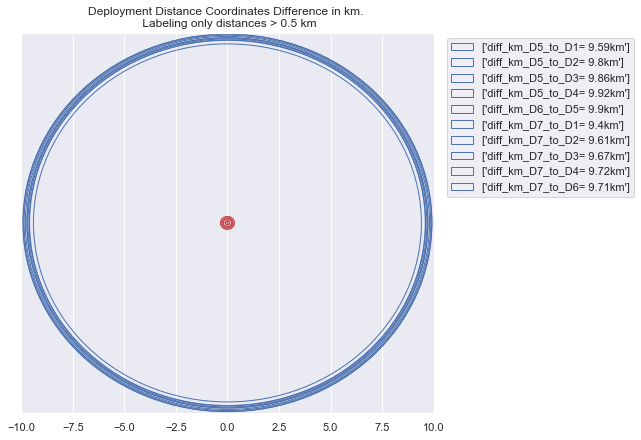

In [11]:
fig, ax = plt.subplots(figsize=(9, 6), constrained_layout=True) 
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
plt.title('Deployment Distance Coordinates Difference in km. \n Labeling only distances > 0.5 km')

handles =[]
labels = []
for i in distance:
    label = [i+'= '+str(round(distance[i],2))+'km']

    if distance[i] <= 0.5:
        circle1 = plt.Circle((0, 0), distance[i], color = 'r', fill=False)#, width=0.1)
        ax.add_artist(circle1)
    else:
        circle = plt.Circle((0, 0), distance[i], color = 'b', fill=False)#, width=0.1)
        ax.add_artist(circle)
        handles.append(circle)
        labels.append(label) 

ax.legend(handles, labels, bbox_to_anchor=(1.5, 1))
ax.get_yaxis().set_major_locator(ticker.NullLocator())

# save figure to a file
fig.savefig(save_to_dir + sensor_name + '_Distance_Coordinates_Difference_in_km.png', dpi = 300, bbox_inches='tight')

> **Observation:**
The sensor is supposed to be deployed at every deployment near the same latitude and longitude location. The acceptable difference should be < .5 km. Deployment 5 and 7 coordinate locations are 9 km further than the rest of the deployments [1, 2, 3, 4, 6], which need to be investigated further to discover if it is a mistake in the entered values or if it is correct and the data need to be labeled. This is important when analyzing the data. The difference should be taken into consideration.

<a id="4"></a>
### Deployment Depth.

In [12]:
# Use pandas data frame to parse the dataframe deploy for 'deployment_depth' and 'water_depth' variable.
deploy[['deployment_depth','water_depth']]

,deployment_depth,water_depth
0,501.0,4145
1,503.0,4145
2,519.0,4145
3,NaN,4146
4,NaN,4169
5,NaN,4145
6,NaN,4176


In [13]:
# Use pandas data frame to parse the dictionary sensor_info for the planned sensor water depth 
z_end_depth = sensor_info['instrument']['end_depth']
z_start_depth = sensor_info['instrument']['start_depth']
print('Sensor expected deployment depth:  ', (z_end_depth, z_start_depth))

Sensor expected deployment depth:   (500, 500)


In [55]:
int(deploy['deployment_number'].values[-1])+1

8

<a id="41"></a>
#### Plot Deployment Depth Location.

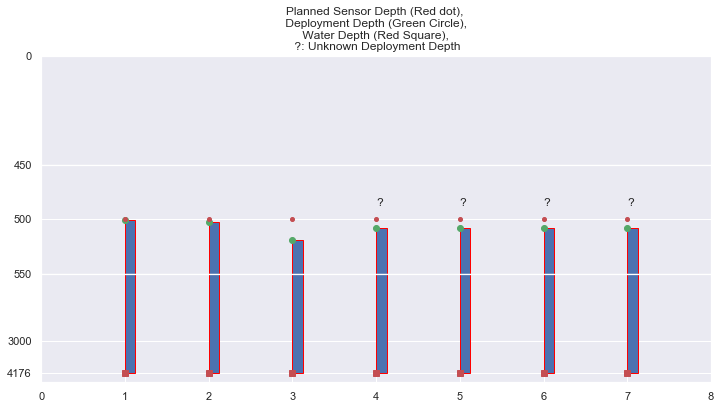

In [78]:
# Define figure parameters
n = 3 #number of subplots
listy_surface = [0,450] # axis tickmarks
listy_middle = [500, 550] # axis tickmarks
listy_bottom = [3000,4176] # axis tickmarks
listy = [450, 550, 4500] # axis tickmarks

visiblex = [False, False, True] # axis formatting

x_range = list(range(len(deploy['deployment_number'])+1))

# figure handle
fig0 = plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel('Deployment Number')
plt.ylabel('Water Depth(m)')

            
# create figure axis
axis_list = []
for j in range(n):
    axis_list.append(plt.subplot(n,1,j+1))

            
            
# Loop through the figure axis
for j, ax in enumerate(axis_list):

    # Loop through the deployment table    
    for i in range(len(deploy['water_depth'])):
        
        # define x and y to plot. x: deployment number, y: water depth
        x_start = int(deploy['deployment_number'][i])
        y_end = int(deploy['water_depth'][i])
        
        # replace unknown deployment depth with the average depth
        if np.isnan(deploy['deployment_depth'][i]):
            y_start = np.nanmean(deploy['deployment_depth'])
            texti = '?'
        else:
            y_start = int(deploy['deployment_depth'][i])
            texti = ' '

        # Create a rectangle
        ax.add_patch(matplotlib.patches.Rectangle((x_start,y_start), 0.125, y_end-y_start, ec="red"))
        
        ax.set_xlim((0, int(deploy['deployment_number'].values[-1])+1))
        ax.get_yaxis().set_major_locator(ticker.FixedLocator(x_range))
        ax.get_xaxis().set_visible(visiblex[j])
                    

        # Plot markers for sensor deployment depths
        if j == 0:           
            ax.set_ylim((listy[j],0))
            ax.get_yaxis().set_major_locator(ticker.FixedLocator(listy_surface))
            ax.set(title="Planned Sensor Depth (Red dot), \n Deployment Depth (Green Circle), \n Water Depth (Red Square), \n ?: Unknown Deployment Depth" )

        if j == 1:
            ax.set_ylim((listy[j],listy[j-1]))
            ax.text(x_start,y_start-20, texti)
            ax.get_yaxis().set_major_locator(ticker.FixedLocator(listy_middle))
            ax.plot(x_start,y_start, 'go-', label='Sensor Depth', linewidth=3)
            ax.plot(x_start, z_start_depth, '.r',markersize=8)

        
        # plot markers for water depth
        if j == n-1:
            ax.set_ylim((listy[j],listy[j-1]))
            ax.plot(x_start,y_end, 'rs',  label='Water Depth',linewidth=2 )
            ax.get_yaxis().set_major_locator(ticker.FixedLocator(listy_bottom))
            
        
# save figure to a file
fig0.savefig(save_to_dir + sensor_name + '_DeploymentDepthComparison.png', dpi = 300)

> **Observation:** The planned sensor water depth is set to 30 m. However, we see that on deployment 3 the sensor was deployed 15 m deeper than planned. The rest of the deploymens [4 - 7] have unkown deployment depths. This is a missing metadata information that needs to be verified. Later on in this notebook we will examine the pressure record in the file that provides an approximate depth of the sensor water depth. However, the metadata informations is the quality check needed for analyzing the data. 

<a id="5"></a>
### Deployment Start and End Dates.

In [79]:
# Use pandas data frame to parse the dataframe deploy for 'start_date' and 'stop_date' variable.
deploy[['start_date','stop_date']]

,start_date,stop_date
0,2013-07-24T06:32:00+00:00,2014-06-18T00:00:00+00:00
1,2014-06-20T02:00:00+00:00,2015-06-07T00:00:00+00:00
2,2015-06-08T21:25:00+00:00,2016-07-03T18:35:00+00:00
3,2016-07-04T23:07:00+00:00,2017-07-17T15:02:00+00:00
4,2017-07-14T22:49:00+00:00,2018-07-25T17:11:00+00:00
5,2018-07-24T23:01:00+00:00,2019-09-27T23:55:00+00:00
6,2019-09-27T21:26:00+00:00,None


In [80]:
# merge lists of start and end dates for plotting purposes together with their matching deployments.
dates=list(deploy['start_date'].values)+list(deploy['stop_date'].values)
names=list(deploy['deployment_number'].values)+list(deploy['deployment_number'].values)


#Replace None with current time
current_time = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
dates = [current_time if v is None else v for v in dates]

# sort array dates
ind  = sorted(range(len(dates)),key=dates.__getitem__)
date_list = [dates[i].split('+')[0] for i in ind ]
deployment_list = [names[i] for i in ind ]


# Convert date strings (e.g. 2014-10-182016-07-03T18:35:00) to datetime
date_list = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in date_list]
date_list, deployment_list

([datetime.datetime(2013, 7, 24, 6, 32),
  datetime.datetime(2014, 6, 18, 0, 0),
  datetime.datetime(2014, 6, 20, 2, 0),
  datetime.datetime(2015, 6, 7, 0, 0),
  datetime.datetime(2015, 6, 8, 21, 25),
  datetime.datetime(2016, 7, 3, 18, 35),
  datetime.datetime(2016, 7, 4, 23, 7),
  datetime.datetime(2017, 7, 14, 22, 49),
  datetime.datetime(2017, 7, 17, 15, 2),
  datetime.datetime(2018, 7, 24, 23, 1),
  datetime.datetime(2018, 7, 25, 17, 11),
  datetime.datetime(2019, 9, 27, 21, 26),
  datetime.datetime(2019, 9, 27, 23, 55),
  datetime.datetime(2020, 6, 22, 21, 9, 5)],
 [1, 1, 2, 2, 3, 3, 4, 5, 4, 6, 5, 7, 6, 7])

<a id="51"></a>
#### Plot Deployment Timeline.

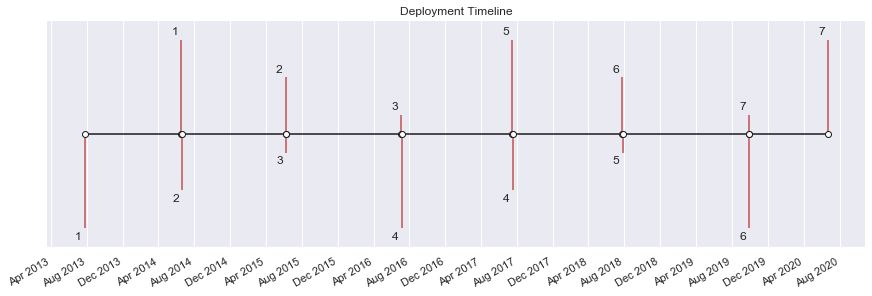

In [81]:
# Create figure and plot a stem plot with the date
fig1, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax.set(title="Deployment Timeline")

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(date_list)/6)))[:len(date_list)]

markerline, stemline, baseline = ax.stem(date_list, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(date_list)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(date_list, levels, deployment_list, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")
    
# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right") 

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)

# save figure to a file
fig1.savefig(save_to_dir + sensor_name + '_DeploymentTimeLine.png', dpi = 300)

> **Observation:** The timeline shows the start and the end of the deployments. The numbers on the line are the deployment numbers. Note that not all deployments start after the end of the previous deployment. Sometimes a new sensor is deployed before the one in the water is recovered. So, there is an ovelap in the data. See the colored text in the table below:



| #|      Start                    |    End                       |
|-|-                      |    -                       |
|3|	2016-07-04T23:07:00+00:00|	2017-07-<font color='red'>17</font>T15:02:00+00:00|
|---|---                      |    ---                       |
|4|	2017-07-<font color='red'>14</font>T22:49:00+00:00|	2018-07-<font color='blue'>25</font>T17:11:00+00:00|
|---|---                      |    ---                       |
|5|	2018-07-<font color='blue'>24</font>T23:01:00+00:00|	2019-09-27T<font color='green'>23</font>:55:00+00:00|
|---|---                      |    ---                       |
|6|	2019-09-27T<font color='green'>21</font>:26:00+00:00|	Not recovered - In water|




<a id="6"></a>
### Deployment Datasets

In [82]:
%cd '/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/Module5_NetCDF_Files/'
%ls

/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/Module5_NetCDF_Files
GP03FLMB-RIM01-02-CTDMOG068_recovered_inst.csv
GP03FLMB-RIM01-02-CTDMOG068_telemetered.csv
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20130724T100001-20140227T140001.nc
deployment0002_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20140620T040001-20141109T000001.nc
deployment0003_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20150608T213001-20160703T183001.nc
deployment0003_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20150609T000001-20160209T220001.nc
deployment0004_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20160704T231501-20170717T150001.nc
deployment0004_GP03FLMB-RIM01-02-CTDMOG068-telemetered-c

In [83]:
# Load files
list_recovered = pd.read_csv('GP03FLMB-RIM01-02-CTDMOG068_recovered_inst.csv')
list_telemetered = pd.read_csv('GP03FLMB-RIM01-02-CTDMOG068_telemetered.csv')

In [84]:
# add the two lists together
url_list=list(list_recovered['files'].values)+list(list_telemetered['files'].values)
url_list

['deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc',
 'deployment0003_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20150608T213001-20160703T183001.nc',
 'deployment0004_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20160704T231501-20170717T150001.nc',
 'deployment0005_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20170714T230001-20180725T170001.nc',
 'deployment0006_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20180724T231501-20190927T234501.nc',
 'deployment0001_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20130724T100001-20140227T140001.nc',
 'deployment0002_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20140620T040001-20141109T000001.nc',
 'deployment0003_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20150609T000001-2

<a id="61"></a>
#### Plot Deployment Datasets - One Parameter.
- The datasets from all deployments and recovery methods are plotted.
- Outliers for a standard deviation equal to 5 are marked on the plot.
- The timeline of deployment is superimposed on the plot for clarity.
- The sensor water depths from the deployment information query are plotted as a level line.

In [85]:
def reject_outliers(data, m=3):
    """
    Reject Outliers Using Statndard Deviation.
    """
    stdev = np.nanstd(data)   
    ind = abs(data - np.nanmean(data)) < m * stdev
       
    return ind

In [88]:
# change directory to the location of the .nc files.
%cd '/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/module5_NetCDF_Files/'
%ls

/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/Module5_NetCDF_Files
GP03FLMB-RIM01-02-CTDMOG068_recovered_inst.csv
GP03FLMB-RIM01-02-CTDMOG068_telemetered.csv
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20130724T100001-20140227T140001.nc
deployment0002_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20140620T040001-20141109T000001.nc
deployment0003_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20150608T213001-20160703T183001.nc
deployment0003_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20150609T000001-20160209T220001.nc
deployment0004_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20160704T231501-20170717T150001.nc
deployment0004_GP03FLMB-RIM01-02-CTDMOG068-telemetered-c

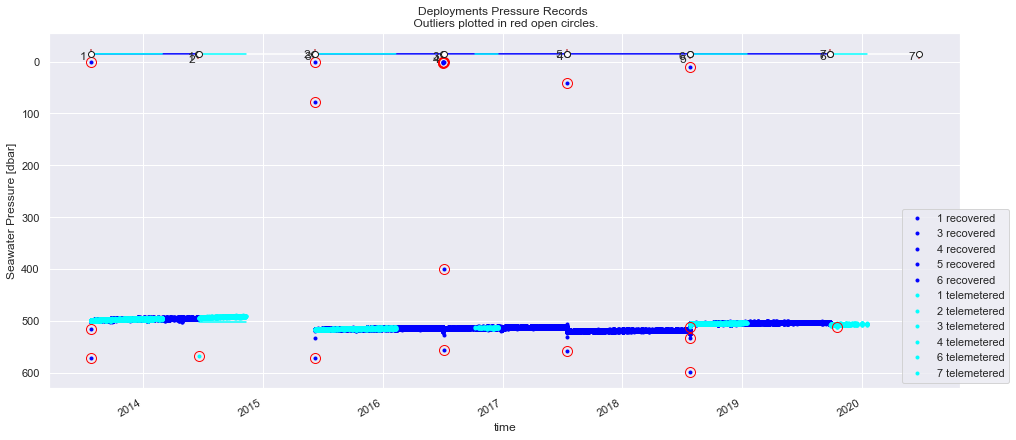

In [90]:
# Quick plots
fig2, ax = plt.subplots(figsize=(14, 6), constrained_layout=True)

# Choose some nice levels
levels = np.tile([-25, -5, -20, -10],
                 int(np.ceil(len(date_list)/4)))[:len(date_list)]

markerline, stemline, baseline = ax.stem(date_list, levels,
                                         linefmt="C3-", basefmt="w-",
                                         use_line_collection=True, bottom= -15)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.full(len(date_list),-15))

# # annotate lines
vert = np.array(['top', 'bottom'])[(levels > -15).astype(int)]
for d, l, r, va in zip(date_list, levels, deployment_list, vert):
    ax.annotate(r, xy=(d, l), xytext=(-4, np.sign(-1)*3),
                textcoords="offset points", va=va, ha="right")
    
for i in range(len(url_list)): #len(list_telemetered)
    d1 = xr.open_dataset(url_list[i])
    d1 = d1.swap_dims({'obs': 'time'})
    
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]

    deploy_num = url_list[i].split('_')[0][-1] 
    delivery_method = url_list[i].split('_')[1].split('-')[4]
    label_text = deploy_num+ ' '+ delivery_method
    
    deploy_line = deploy['deployment_depth'][deploy['deployment_number'] == int(deploy_num)].values[0]
   
    if delivery_method == 'recovered':
        color_dots = 'blue'
    else:
        color_dots = 'cyan'
        
    d1['ctdmo_seawater_pressure'].plot(ax=ax,label=label_text,marker='.', color=color_dots, linestyle='None')
    
    deploy_line = np.full((1,len(date_arr)), deploy_line)[0]
    ax.plot(date_arr, deploy_line, markersize=1, color=color_dots)
    
    time_line = np.full((1, len(date_arr)), -15)[0]
    ax.plot(date_arr, time_line, markersize=1, color=color_dots)
    
    #reject outliers
    ind = reject_outliers(d1['ctdmo_seawater_pressure'].values, 5)
    
    res = [i for i, val in enumerate(ind) if val == False] 
    date_list_good = [date_arr[i] for i in res]
    pressure_good = [d1['ctdmo_seawater_pressure'].values[i] for i in res]
    ax.plot(date_list_good, pressure_good, linestyle='None', color='red', marker='o',markersize=10, fillstyle='none')
    
    
ax.legend(loc='lower right', bbox_to_anchor=(1.06, 0))
ax.set(title="Deployments Pressure Records \n Outliers plotted in red open circles.")
plt.gca().invert_yaxis()

# save figure to a file
fig2.savefig(save_to_dir + sensor_name + '_PressureRecord_Outliers.png', dpi = 300, bbox_inches='tight')

> **Observation:** 
- Each deployment is supposed to have two delivery data methods, recovered and telemetered. However, there are missing recovered and telemetered data:
    - Deployment 2 recovered data are missing
    - Deployments 5 and 6 telemetered data are missing. 
    - Deployment 7 recovered data are not missing the sensor is still in the water, it has not been recovered yet.
- When comparing the deployment start and end date to the data points availability in the data files, you can visualy spot where data are missing on the the timeline:
    - Deployment 1 telemetered data are missing at the end of the deployment 
    - Deployment 2 telemetered data are missing at the end of the deployment
    - Deployment 3 telemetered data are missing at the end of the deployment
    - Deployment 4 telemetered data are missing at the begining and the end of the deployment
- Comparing the pressure record to the sensor deployment depth (straight line), there exist a difference between values:
    - deployments 1 and 2 are deployed shallower than the sensor depth entered in the metadata deployment file.
    - deployment 3 is deployed shallower than the metadata sensor depth but deeper than the planned depth of (30 m).
    - the rest of the deployments cannot be coampared becauae of the missing metadata.
- Outliers in the pressure record are visually captured. Using the statistical method of flaging values falling beyond 5 standard deviation of the means is used here to highlight those data point. It seems that they occur at the begining and the end of the deployment which not unusual with oceanographic instrument deployment. The rest of the data seem of acceptable quality.

<a id="62"></a>
#### Plot Deployment Datasets - Multi-Parameter.

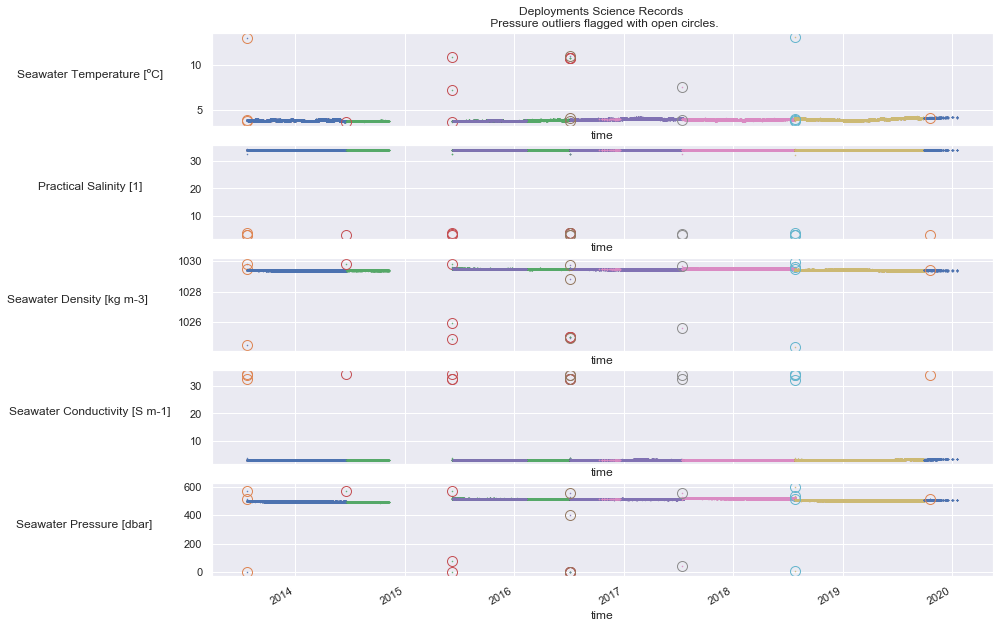

In [91]:
# plot multiple variables at once
fig3, (ax1,ax2,ax3,ax4, ax5) = plt.subplots(5,1, sharex=True, figsize=(14,10))
for i in range(len(url_list)): #len(list_telemetered)
    d1 = xr.open_dataset(url_list[i])
    d1 = d1.swap_dims({'obs': 'time'})
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]

    # plot datasets
    d1['ctdmo_seawater_temperature'].plot(ax=ax1,linestyle='None',marker='.',markersize=1)
    d1['practical_salinity'].plot(ax=ax2,linestyle='None',marker='.',markersize=1)
    d1['density'].plot(ax=ax3,linestyle='None',marker='.',markersize=1)
    d1['ctdmo_seawater_conductivity'].plot(ax=ax4,linestyle='None',marker='.',markersize=1)
    d1['ctdmo_seawater_pressure'].plot(ax=ax5,linestyle='None',marker='.',markersize=1)
    
    #Get indices to flag the pressure outliers.
    ind = reject_outliers(d1['ctdmo_seawater_pressure'].values, 5)   
    res = [i for i, val in enumerate(ind) if val == False] 
    
    date_list_good = [date_arr[i] for i in res]
    
    pressure_good = [d1['ctdmo_seawater_pressure'].values[i] for i in res]
    temp_good = [d1['ctdmo_seawater_temperature'].values[i] for i in res]
    sal_good = [d1['practical_salinity'].values[i] for i in res]
    cond_good = [d1['ctdmo_seawater_conductivity'].values[i] for i in res]
    den_good = [d1['density'].values[i] for i in res]
    
    # plot outliers
    ax1.plot(date_list_good, temp_good, linestyle='None',marker='o',markersize=10, fillstyle='none')
    ax2.plot(date_list_good, cond_good, linestyle='None',marker='o',markersize=10, fillstyle='none')
    ax3.plot(date_list_good, den_good, linestyle='None',marker='o',markersize=10, fillstyle='none')
    ax4.plot(date_list_good, sal_good, linestyle='None',marker='o',markersize=10, fillstyle='none')
    ax5.plot(date_list_good, pressure_good, linestyle='None',marker='o',markersize=10, fillstyle='none')
    
    # set axis
    ax1.set_ylabel(ax1.get_ylabel(), rotation='horizontal', labelpad=100, wrap=False)
    ax2.set_ylabel(ax2.get_ylabel(), rotation='horizontal', labelpad=100, wrap=False)
    ax3.set_ylabel(ax3.get_ylabel(), rotation='horizontal', labelpad=100, wrap=False)
    ax4.set_ylabel(ax4.get_ylabel(), rotation='horizontal', labelpad=100, wrap=False)
    ax5.set_ylabel(ax5.get_ylabel(), rotation='horizontal', labelpad=100, wrap=False)
   
    
ax1.set(title="Deployments Science Records \n Pressure outliers flagged with open circles.")

# save figure to a file
fig3.savefig(save_to_dir + sensor_name + '_ScienceRecords_Outliers.png', dpi = 300, bbox_inches='tight')

<a id="63" ></a>
### Plot Science Variables Without Outliers.

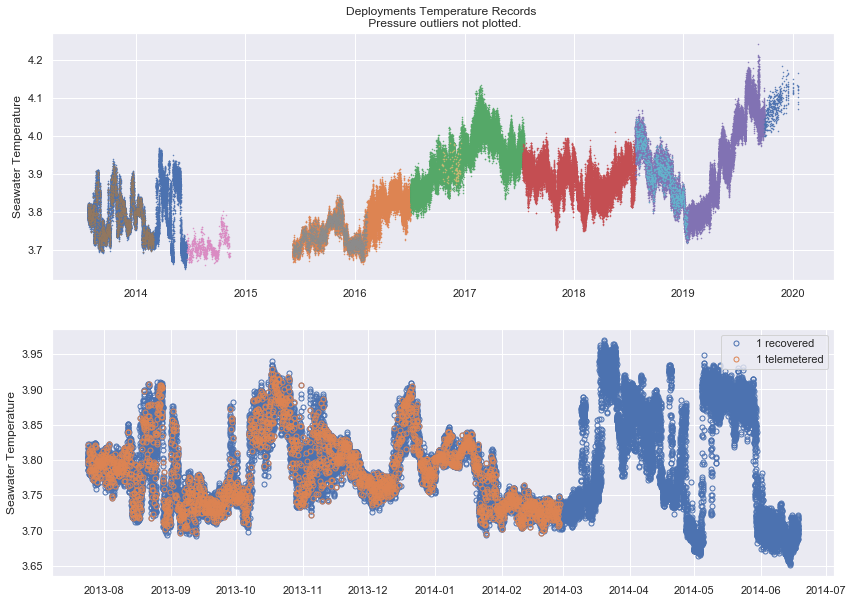

In [92]:
fig4,(ax1, ax2) = plt.subplots(2,1, figsize=(14,10))
for i in range(len(url_list)): #len(list_telemetered)
    d1 = xr.open_dataset(url_list[i])
    d1 = d1.swap_dims({'obs': 'time'})
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]
    deploy_num = url_list[i].split('_')[0][-1]
    delivery_method = url_list[i].split('_')[1].split('-')[4]
    label_text = deploy_num + ' '+ delivery_method
    #Get indices to flag the pressure outliers.
    ind = reject_outliers(d1['ctdmo_seawater_pressure'].values, 5)   
    res = [i for i, val in enumerate(ind) if val == True] 
    
    date_list_good = [date_arr[i] for i in res]
    
    temp_good = [d1['ctdmo_seawater_temperature'].values[i] for i in res]

    
    # plot outliers
    ax1.plot(date_list_good, temp_good, linestyle='None', marker='.', markersize=1) 
    if int(deploy_num) == 1:       
        ax2.plot(date_list_good, temp_good, linestyle='None', marker='o', markersize=5, fillstyle='none', label=label_text) 
        ax2.set_ylabel(d1['ctdmo_seawater_temperature'].long_name, rotation='vertical', wrap=False)
        ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))
        
    # set axis
    ax1.set_ylabel(d1['ctdmo_seawater_temperature'].long_name, rotation='vertical', wrap=False)
   
    
ax1.set(title="Deployments Temperature Records \n Pressure outliers not plotted.")

# save figure to a file
fig4.savefig(save_to_dir + sensor_name + '_ScienceRecords_Clean.png', dpi = 300, bbox_inches='tight')

> **Observation:**  Removing the outliers help a better representation of the data. For example, the temperature record show an annual cycle of the water warmer in spring and summer and lower in fall winter. 
- Comparison between telemetered and recovered data for the 1st deployment show diferences in values for the same timestamps. In a previous Lab we have shown how to compare data to caluclate the difference and identify problems. 
- It is also clear that the first few months of temperature record have more variability than the rest of the record. 
- The differences between telemetered and recovered data and the change in data pattern are issues that need to be investigated to discover if it is a system problem (algorythms not working properly) or a sensor problem (setting problems or malfunctioning problems). 

<a id="7" ></a>
### Report Flags.
- To report suspect or bad data the rule in data quality control is to never delete a data point. You should rather use flags. In this example, we are using boleen variables to attach to timestamps. For example here the pressure record is used to flag data that are outside the 5 standad deviation envolope. 
- The record can be used another column in the file to report on revie=wed data flags for the user to look at

In [93]:
#reject outliers
flag_df = pd.DataFrame()
index_list=[]
for i in range(len(url_list)): #len(list_telemetered)
    file_name = url_list[i]
    d1 = xr.open_dataset(file_name)
    d1 = d1.swap_dims({'obs': 'time'})
    
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]
    
    ind = reject_outliers(d1['ctdmo_seawater_pressure'].values, 5)

    index_list = [file_name for n in range(len(date_arr))] 
    
    df0 = pd.DataFrame({'Date': date_arr, 'Pressure_Flag': ind}, index=index_list)
    flag_df = flag_df.append(df0)
    
flag_df

,Date,Pressure_Flag
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 06:45:01,False
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:00:01,False
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:15:01,False
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:30:01,True
deployment0001_GP03FLMB-RIM01-02-CTDMOG068-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:45:01,True
...,...,...
deployment0007_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 04:00:01,True
deployment0007_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 08:00:01,True
deployment0007_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 12:00:01,True
deployment0007_GP03FLMB-RIM01-02-CTDMOG068-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 16:00:01,True


<a id="8"></a>
### Data Annotations.

In [94]:
# Use pandas data frame to parse the dictionary sensor_info for 'annotations' information.
annotation = pd.DataFrame(sensor_info['instrument']['annotations'])
annotation.keys()

Index(['id', 'reference_designator', 'method', 'stream', 'parameter',
       'start_datetime', 'end_datetime', 'annotation', 'exclusionFlag',
       'qcFlag', 'source'],
      dtype='object')

In [95]:
annotation[['id','start_datetime', 'end_datetime', 'annotation']]

,id,start_datetime,end_datetime,annotation
0,154,2013-07-24T02:32:00+00:00,2014-06-17T20:00:00+00:00,Deployment 1: Mooring was deployed 5-10m shall...
1,585,2014-06-19T22:00:00+00:00,2015-06-06T20:00:00+00:00,Deployment 2: Recovered data are not available...
2,155,2014-06-19T22:00:00+00:00,2015-06-06T20:00:00+00:00,Deployment 2: Mooring was deployed 10-15m shal...
3,156,2015-06-08T17:25:00+00:00,2016-07-03T14:35:00+00:00,Deployment 3: Mooring was deployed 10m deeper ...
4,157,2016-07-04T19:07:00+00:00,2017-07-17T11:02:00+00:00,Deployment 4: Mooring was deployed 10m deeper ...
5,2173,2017-07-14T18:49:00+00:00,2018-07-25T13:11:00+00:00,Deployment 5: It was discovered upon recovery ...
6,142,2017-07-14T18:49:00+00:00,2018-07-25T13:11:00+00:00,Deployment 5: Telemetered data are not availab...


<a id="9"></a>
### Data Notes.

In [96]:
# Use pandas data frame to parse the dictionary sensor_info for 'notes' information.
note = pd.DataFrame(sensor_info['instrument']['notes'])
note.keys()

Index(['id', 'user_id', 'type', 'comment', 'model', 'reference_designator',
       'deployment', 'asset_uid', 'start_date', 'end_date', 'status',
       'redmine_issue', 'resolved_date', 'image_url', 'created', 'modified',
       'user'],
      dtype='object')

In [97]:
note[['id','type','model', 'start_date', 'end_date', 'comment']]

,id,type,model,start_date,end_date,comment
0,506,comment,sites,2016-07-04T23:07:00+00:00,2018-07-25T17:11:00+00:00,Deployments 4 and 5 don't have deployment dept...
1,548,annotation,instruments,2014-06-20T02:00:00+00:00,2015-06-07T00:00:00+00:00,Annotation ID 585 should provide more informat...
2,543,comment,sites,None,None,Annotation ID 1531: recovered_host data are no...
3,517,comment,sites,2017-07-14T22:49:00+00:00,2018-07-25T17:11:00+00:00,The mooring was deployed 9 - 10 km from the lo...


<a id="10"></a>
### Data Report Files.

In [43]:
flag_df.to_csv(save_to_dir+'/'+sensor_name+'_PressureFlags.csv')
annotation.to_csv(save_to_dir+'/'+sensor_name+'_Annotations.csv')
note.to_csv(save_to_dir+'/'+sensor_name+'_Notes.csv')

### END